In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
spectres_filename = "/Users/glpopov/Downloads/MacbethColorChecker.xls"
spectres_file = pd.ExcelFile(spectres_filename)

sheet = spectres_file.parse('Sheet1')
print(sheet)

   Data are from N. Ohta, "The Basis of Color Reproduction Engineering (Japanese)", published by Corona-sha Co of Japan in 1997  \
0                                                 NaN                                                                             
1                                          wavelength                                                                             
2                                                 380                                                                             
3                                                 385                                                                             
4                                                 390                                                                             
..                                                ...                                                                             
78                                                760                              

In [3]:
wavelengths = list(range(380, 785, 5))
print(wavelengths)


[380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780]


In [4]:
spectres = dict()
for i in range(1, 25):
    spectres[i] = list()
    current_column = sheet['Unnamed: ' + str(i)]
    for j, value in enumerate(current_column):
        if j <= 1:
            continue
        spectres[i].append(value)

In [5]:
print(spectres)

{1: [0.048, 0.051, 0.055, 0.06, 0.065, 0.068, 0.068, 0.067, 0.064, 0.062, 0.059, 0.057, 0.055, 0.054, 0.053, 0.053, 0.052, 0.052, 0.052, 0.053, 0.054, 0.055, 0.057, 0.059, 0.061, 0.062, 0.065, 0.067, 0.07, 0.072, 0.074, 0.075, 0.076, 0.078, 0.079, 0.082, 0.087, 0.092, 0.1, 0.107, 0.115, 0.122, 0.129, 0.134, 0.138, 0.142, 0.146, 0.15, 0.154, 0.158, 0.163, 0.167, 0.173, 0.18, 0.188, 0.196, 0.204, 0.213, 0.222, 0.231, 0.242, 0.251, 0.261, 0.271, 0.282, 0.294, 0.305, 0.318, 0.334, 0.354, 0.372, 0.392, 0.409, 0.42, 0.436, 0.45, 0.462, 0.465, 0.448, 0.432, 0.421], 2: [0.103, 0.12, 0.141, 0.163, 0.182, 0.192, 0.197, 0.199, 0.201, 0.203, 0.205, 0.208, 0.212, 0.217, 0.224, 0.231, 0.24, 0.251, 0.262, 0.273, 0.282, 0.289, 0.293, 0.296, 0.301, 0.31, 0.321, 0.326, 0.322, 0.31, 0.298, 0.291, 0.292, 0.297, 0.3, 0.298, 0.295, 0.295, 0.305, 0.326, 0.358, 0.397, 0.435, 0.468, 0.494, 0.514, 0.53, 0.541, 0.55, 0.557, 0.564, 0.569, 0.574, 0.582, 0.59, 0.597, 0.605, 0.614, 0.624, 0.637, 0.652, 0.668, 0.682,

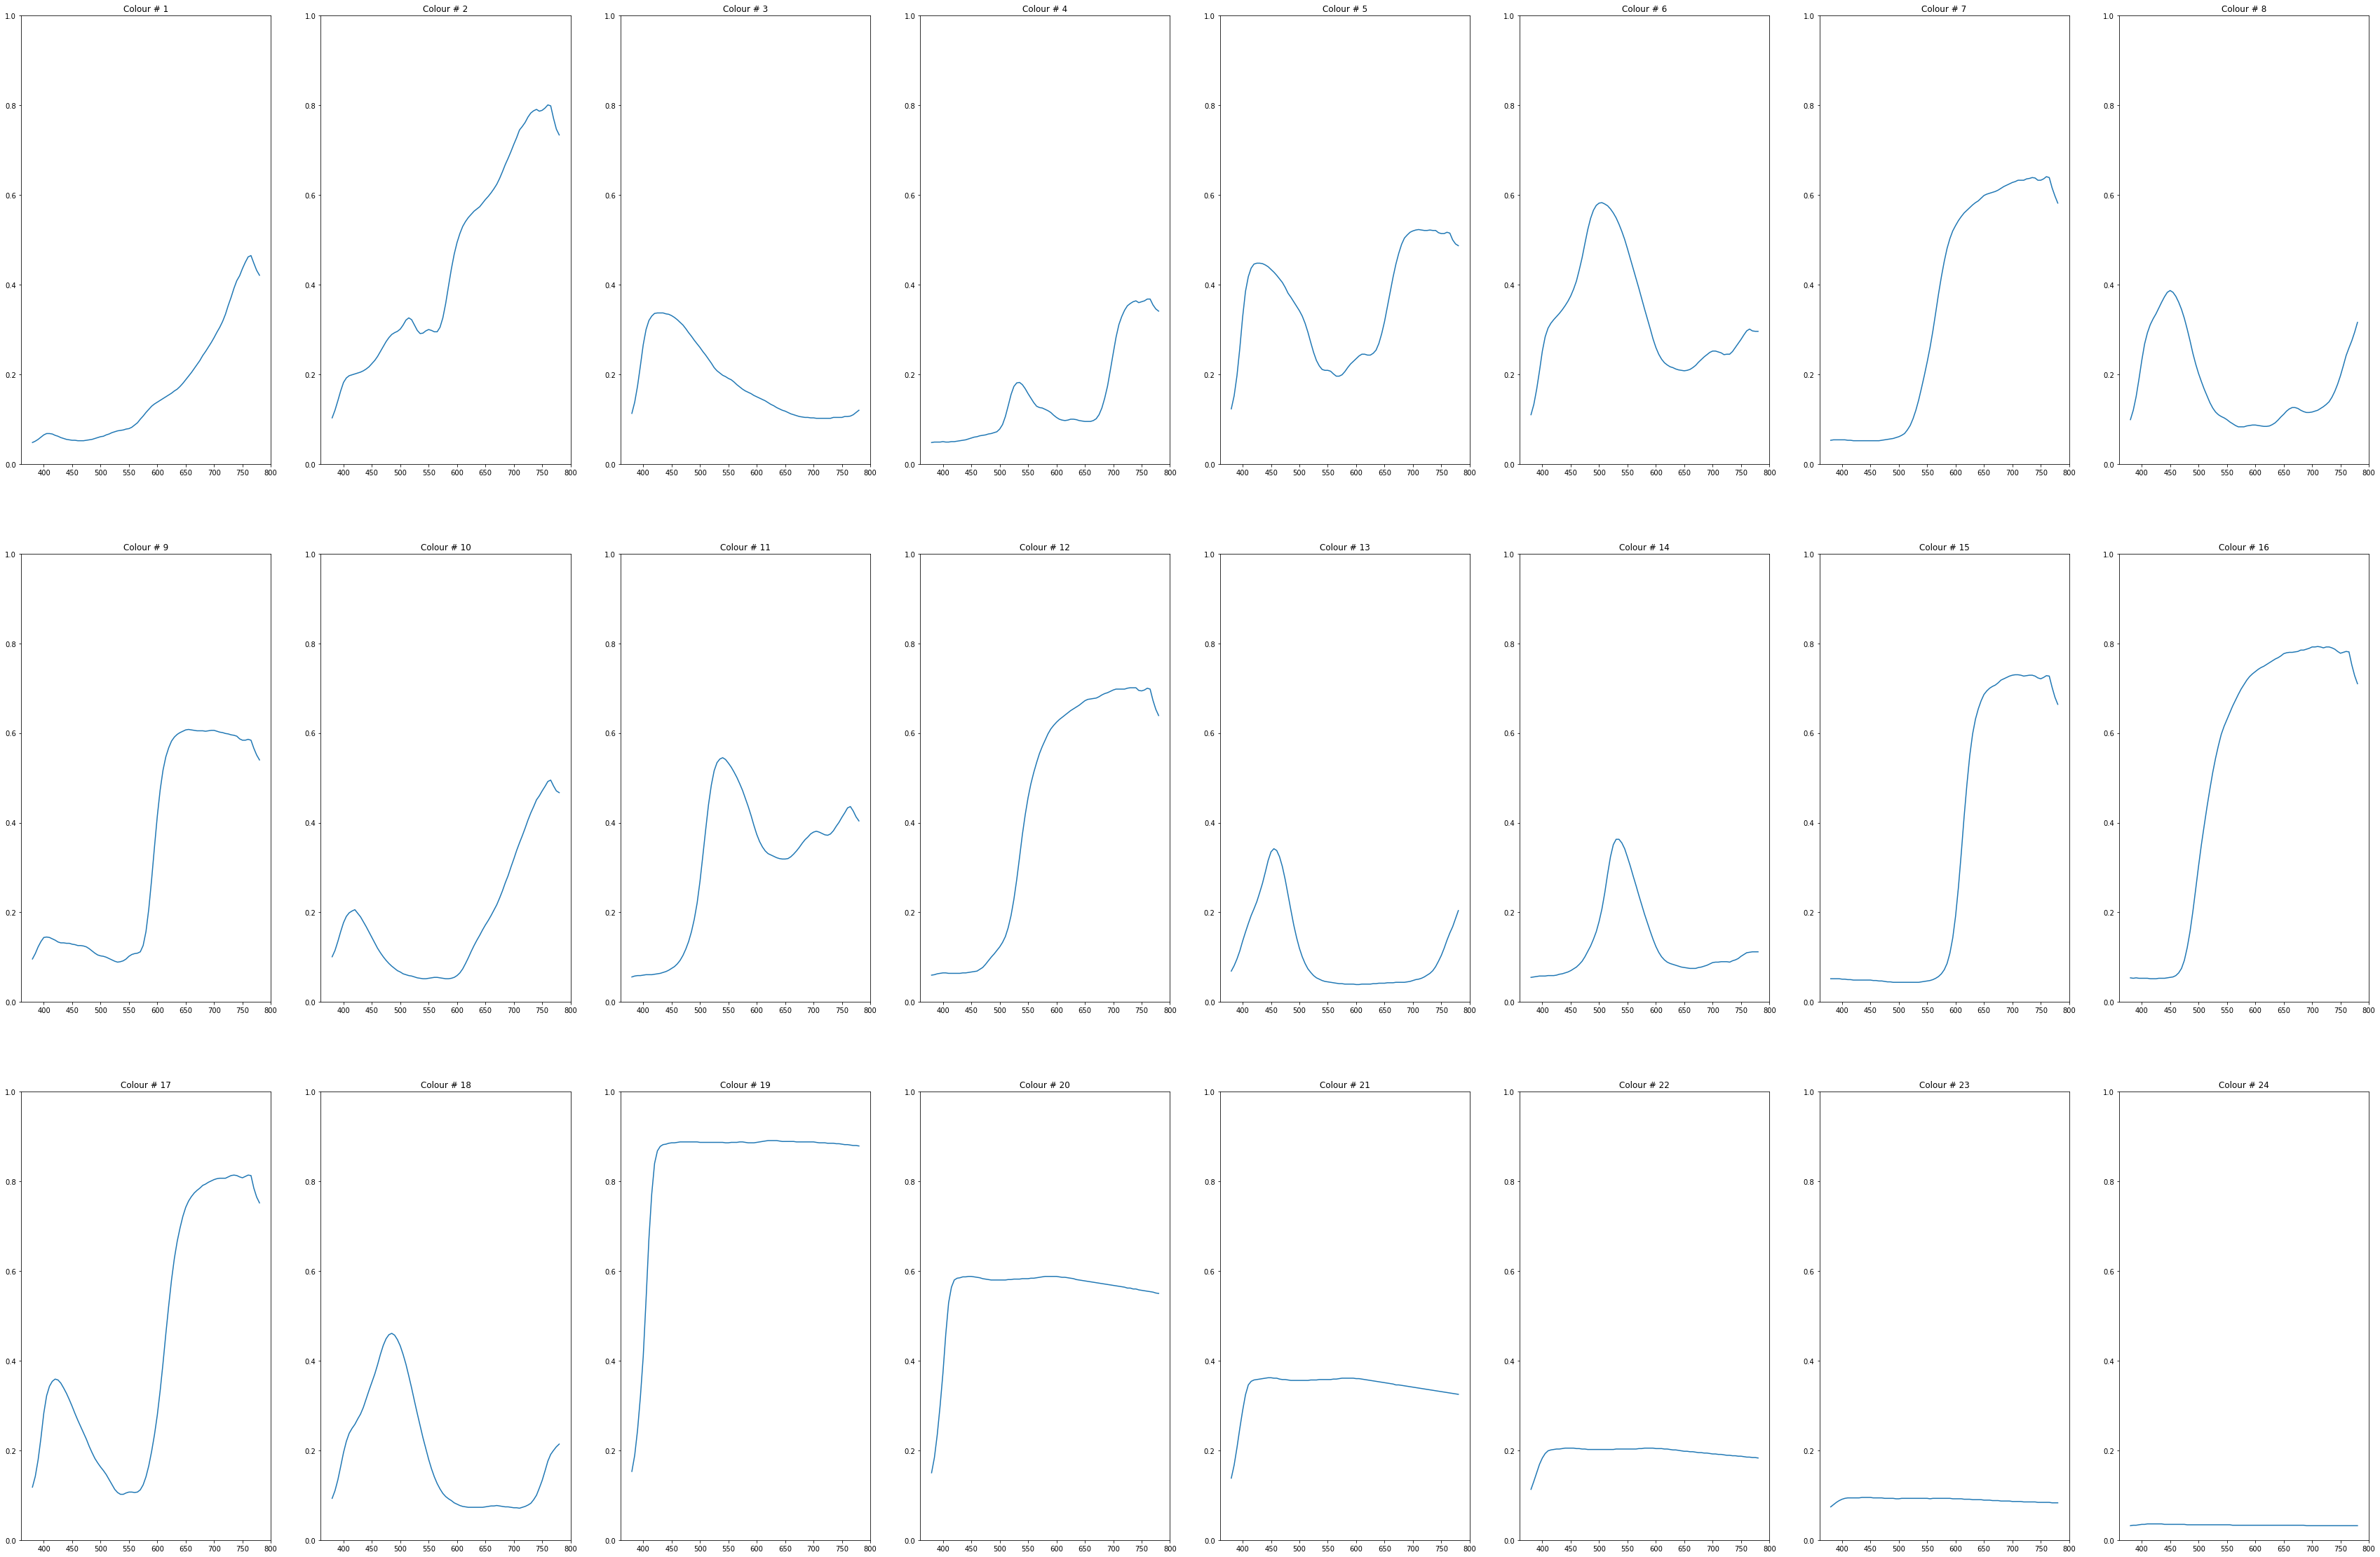

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=8, figsize=(60, 40))

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        colour_number = 8 * i + j + 1
        col.plot(wavelengths, spectres[colour_number])
        ax[i,j].set_ylim(top=1, bottom=0)
        ax[i,j].set_title('Colour # ' + str(colour_number))
        

plt.show()

In [7]:
import colour
import colour.colorimetry as clr
import colour.plotting as clplt

swatches = []

for i in range(3):
    for j in range(8):
        colour_number = 8 * i + j + 1
        sd = spectres[colour_number]
        spd = dict()
        for k, value in enumerate(sd):
            spd[wavelengths[k]] = value
        spd = colour.SpectralDistribution(spd)
        csd = clr.sd_to_XYZ(spd)
        csd = colour.XYZ_to_sRGB(csd / 100)
        for k, v in enumerate(csd):
            if v < 0:
                csd[k] = 0
            if v > 1:
                csd[k] = 1
        swatches.append(clplt.ColourSwatch(RGB=csd))
clplt.plot_multi_colour_swatches(swatches)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x123b83f10>)

In [8]:
reflectances = []
start = 380
step = 4
wavelengths = list(range(380, 784, 4))

In [9]:
with open('reflect_db.reflect') as fp:
    line = fp.readline()
    lines = 0
    empty = 0
    while line:
        if line[0] != '#' and line[0] != '\n':
            # this means its a number
            num = float(line)
            current = dict()
            for i in range(100):
                current[wavelengths[i]] = num
                line = fp.readline()
                num = float(line)
            reflectances.append(current)
        line = fp.readline()

In [10]:
print(len(reflectances))

1995


In [11]:
def draw_reflectance(r):
    x, y = [], []

    for xx, yy in r.items():
        x.append(xx)
        y.append(yy)

    plt.plot(x, y)
    plt.ylim(top=1, bottom=0)
    plt.show()

In [12]:
def draw_colour(r):
    dist = colour.SpectralDistribution(r)
    spd = colour.SpectralDistribution(dist)
    csd = clr.sd_to_XYZ(spd)
    csd = colour.XYZ_to_sRGB(csd / 100)
    for k, v in enumerate(csd):
        if v < 0:
            csd[k] = 0
        if v > 1:
            csd[k] = 1
    clplt.plot_single_colour_swatch(clplt.ColourSwatch(RGB=csd))

draw_colour(reflectances[10])

ValueError: Tristimulus values conversion from spectral data according to practise "ASTM E308-15" should be performed on spectral data with measurement interval of 1, 5, 10 or 20nm!

In [13]:
draw_reflectance(reflectances[10])
# draw_colour(reflectances[10])

In [14]:
import numpy as np
from sklearn.decomposition import PCA

numpyarrays = []
for ref in reflectances:
    t = []
    for k, v in ref.items():
        t.append(v)
    numpyarrays.append(np.array(np.float64(t)))
print(numpyarrays[0])

[ 0.074541  0.088587  0.11474   0.15397   0.20474   0.25672   0.30915
  0.35575   0.38834   0.40627   0.42487   0.45178   0.46975   0.48732
  0.51316   0.53978   0.55936   0.57167   0.57851   0.58111   0.58197
  0.58209   0.58111   0.57789   0.57015   0.55912   0.54464   0.52745
  0.50833   0.48853   0.46555   0.4441    0.42166   0.3972    0.37077
  0.34357   0.31593   0.29507   0.27708   0.26114   0.24547   0.22746
  0.20786   0.18758   0.16651   0.14636   0.12834   0.11283   0.10191
  0.093427  0.086994  0.082166  0.077672  0.07382   0.069738  0.065722
  0.062136  0.05915   0.057736  0.057234  0.057224  0.057908  0.059067
  0.060615  0.06277   0.065697  0.070047  0.07466   0.079789  0.08538
  0.091242  0.095583  0.097461  0.097572  0.096137  0.093968  0.091498
  0.0885    0.084736  0.079779  0.075589  0.072446  0.070676  0.071531
  0.074726  0.079627  0.086574  0.097926  0.11161   0.13098   0.15994
  0.20573   0.26057   0.32644   0.40305   0.47676   0.5337    0.57906
  0.61773   0.63

In [15]:
print(numpyarrays[0].shape)

(100,)


In [16]:
pca = PCA(n_components=None)

In [17]:
X_std = pca.fit_transform(numpyarrays)

In [18]:
X_std

array([[ -2.42218903e-01,   1.54230148e+00,  -1.23915129e+00, ...,
         -5.32187292e-04,  -9.56339080e-05,   4.78901795e-05],
       [ -1.48153201e+00,   7.12673641e-01,  -5.58184007e-01, ...,
          1.43471685e-04,  -5.69947615e-05,  -2.36466912e-04],
       [  2.24682047e+00,  -2.40296390e+00,  -7.20858379e-01, ...,
         -5.03870753e-04,   3.40737436e-05,  -6.79514104e-04],
       ..., 
       [  1.39621126e-01,  -1.56649093e+00,   7.37334194e-01, ...,
         -5.41494974e-05,   8.32236515e-05,   2.29787285e-04],
       [ -1.73377551e+00,  -2.09618472e-01,   1.21042152e-01, ...,
          2.03906837e-04,   6.40956111e-05,  -2.14335259e-04],
       [  3.58718135e-01,   5.72319018e-01,   7.91621901e-01, ...,
          8.37183945e-05,   6.57540685e-04,   4.90007123e-04]])

In [19]:
var = pca.explained_variance_ratio_


In [20]:
print(sum(var))

1.0


In [21]:
print(np.cumsum(var))

[ 0.717528    0.86085742  0.93650776  0.97196615  0.9873022   0.99214244
  0.99423412  0.99586453  0.99715015  0.99789905  0.99837586  0.99868723
  0.99895375  0.99915102  0.99931352  0.99944576  0.99957469  0.9996627
  0.99972356  0.99977662  0.9998244   0.99986513  0.99989508  0.99991599
  0.99992765  0.99993865  0.99994633  0.99995329  0.99995971  0.99996507
  0.9999698   0.99997277  0.99997564  0.99997798  0.99998016  0.99998173
  0.99998314  0.99998444  0.99998562  0.99998652  0.99998729  0.99998797
  0.99998861  0.99998921  0.9999898   0.99999035  0.99999084  0.99999133
  0.9999918   0.99999225  0.99999264  0.99999302  0.99999339  0.99999374
  0.99999406  0.99999436  0.99999464  0.99999491  0.99999516  0.99999539
  0.99999561  0.99999582  0.99999601  0.99999619  0.99999637  0.99999654
  0.9999967   0.99999685  0.999997    0.99999714  0.99999728  0.99999742
  0.99999755  0.99999768  0.9999978   0.99999792  0.99999804  0.99999816
  0.99999827  0.99999838  0.99999848  0.99999858  0.

Видно, что первые шесть компонент описывают данные на 99%, а значит они лучше всего описывают данные. Получается, что 100-мерное пространство мы можем хорошо приблизить(?) шестимерным.